In [3]:
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook as tqdm
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
import matplotlib.pyplot as plt
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
bow = pd.read_csv("/content/drive/MyDrive/G5 Inter-Promo 2021/Données/Input/BOW.csv")

In [ ]:
df_lexique = pd.read_csv(
    "/content/drive/MyDrive/G5 Inter-Promo 2021/Ressources/Lexique_Innovation.txt", sep="  ", header=None)
df_lexique.columns = ['mots_cle']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [ ]:
def preprocessing(sentence: str) -> str:
    """Documentation
    Parameters:
        data: 1 column of a dataframe especially choose because we want a column who contain only text

    Out (if exists):
        liste_return: liste of all the text of the dataframe return with preprocessing applied
    """
    stop_words: set = set(stopwords.words('french'))
    pattern: list = ['(', ')', ':', ';', ',', '&', '/',
               '"', "'", '\n', '©', 'n°', '-']
    if not isinstance(sentence, str):
        sentence: str = str(sentence)

    sentence: str = re.sub(r'\d', ' ', sentence)

    sentence: str = sentence.lower()

    for d in pattern:
        sentence: str = sentence.replace(d, " ")

    token_words: list = word_tokenize(sentence)
    filtre: type = [w for w in token_words if not w in stop_words]

    final_list: str = ""
    for word in filtre:
        final_list: str = final_list + word + " "
    return(final_list)

In [ ]:
# Generates a word cloud for an article
def wordcloud_art(text: str):
    """Documentation
    Parameters:
        text: the article that will be show on the word cloud
    """
    text: str = preprocessing(text)
    if len(text) > 0:
        wordcloud: str = WordCloud(relative_scaling=1.0,).generate(str(text))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()
        plt.close()
    else:
        print("The article have a size of 0.")

In [ ]:
# Generates a word cloud from a list of articles
def wordcloud_list_art(text: list):
    """Documentation
    Parameters:
        text: the list of articles that will be show on the word cloud
    """
    list_articles: str = ""
    for i in range(len(text)):
        list_articles: str = list_articles + text[0]
    wordcloud_art(text)

In [ ]:
column_name = list(bow)

In [ ]:
identique = []
for i in tqdm(range(len(column_name))):
  for j in range(len(df_lexique['mots_cle'])) :
    if (column_name[i] == df_lexique['mots_cle'][j]):
      identique.append(column_name[i]) 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [ ]:
identique

['3d',
 'cloud',
 'conjoncture',
 'digitalisation',
 'enjeux',
 'innovation',
 'optimisation',
 'prospective',
 'réseau',
 'résilience',
 'saas',
 'si',
 'sécurité',
 'traçabilité',
 'écologie']

In [ ]:
bow_key = bow[identique]

In [ ]:
bow_key

,3d,cloud,conjoncture,digitalisation,enjeux,innovation,optimisation,prospective,réseau,résilience,saas,si,sécurité,traçabilité,écologie
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12256,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0
12257,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0
12258,0,2,0,0,0,0,0,0,2,0,1,3,0,0,0
12259,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
tot = []
for i in identique:
  tot.append(bow_key[i].sum())

In [ ]:
bow = pd.read_json('/content/drive/MyDrive/G5 Inter-Promo 2021/Données/Output/Innovation/Res_Innovation_semi_supervised_bow.json')

In [ ]:
features = pd.read_json('/content/drive/MyDrive/G5 Inter-Promo 2021/Données/Output/Innovation/Res_Innovation_semi_supervised_Feature.json')

In [ ]:
df = pd.read_json('/content/drive/MyDrive/G5 Inter-Promo 2021/Données/Input/df_final_clean.json')

In [ ]:
len(df)

7533

In [ ]:
df_compare = pd.merge(left=features, right=bow, left_on='art_id', right_on='art_id')

In [ ]:
df_compare.head()

,art_id,innovation_features,innovation_detection_bow
0,7106,0,0
1,1828,1,1
2,6835,1,1
3,7939,0,0
4,811,1,1


In [ ]:
identique = 0
for i in range(len(df_compare)):
  if (df_compare['innovation_detection_bow'][i] == df_compare['innovation_features'][i]):
    identique = identique + 1

In [ ]:
print('le taux de prédictions identiques selon les modèles utilisés est de : ' + str((identique/len(df_compare))*100) + ' %')

le taux de prédictions identiques selon les modèles utilisés est de : 77.3846781875085 %


In [ ]:
df_analyse = pd.merge(left=df, right=df_compare, left_on='art_id', right_on='art_id')

In [ ]:
df_innovation_features = df_analyse[df_analyse['innovation_features'] == 1]

In [ ]:
df_no_innovation_features = df_analyse[df_analyse['innovation_features'] == 0]

In [ ]:
df_innovation_bow = df_analyse[df_analyse['innovation_detection_bow'] == 1]

In [ ]:
df_no_innovation_box = df_analyse[df_analyse['innovation_detection_bow'] == 0]

In [ ]:
df_compare['innovation_features'].value_counts()

1    4376
0    2973
Name: innovation_features, dtype: int64

In [ ]:
df_compare['innovation_detection_bow'].value_counts()

0    4537
1    2812
Name: innovation_detection_bow, dtype: int64

In [ ]:
df_innovation_features.head(1)

,art_id,art_content,art_content_html,art_extract_datetime,art_lang,art_title,art_url,src_name,src_type,src_url,src_img,art_auth,art_tag,Nb_key_words,Nb_key_words_title,Nb_words,Nb_words_title,Nb_sentences,average_word_sentence,ratio_word_title_on_word,exclamation,interrogation,ratio_key_words,ratio_key_sentences,ratio_key_word_title,netloc.com,nb_word_path,content_postive_score,title_postive_score,content_negative_score,title_negative_score,content_polarity_score,title_polarity_score,content_subjectivity_score,title_subjectivity_score,innovation_features,innovation_detection_bow
2,25,Quels étaient les objectifs poursuivis par le ...,"<p style=""text-align: justify;""><strong>Quels ...",24 octobre 2019,fr,"Interview de M. Olivier DUSSOPT, Secretaire d’...",http://fncdg.com/interview-de-m-olivier-dussop...,FNCDG,xpath_source,http://fncdg.com/actualites/,http://fncdg.com/wp-content/uploads/2019/10/in...,NaN,NaN,3,0,1340,19,54,24.814815,0.014179,0,4,0.002239,0.055556,0.0,['.com'],19,0.0,0.0,0.006,0.0,0.026786,0.1,0.261905,0.1,1,0


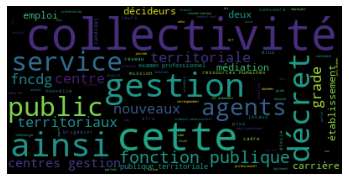

In [ ]:
wordcloud_list_art(df_no_innovation_features.loc[2:12,"art_content"].tolist())

In [ ]:
test = pd.read_json('/content/drive/MyDrive/G5 Inter-Promo 2021/Données/Input/Data_With_Features_Syntax_v1.json')

In [ ]:
len(test)

7460

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/G5 Inter-Promo 2021/Données/Input/Data_With_Features_Syntax.csv')

In [ ]:
# Count the number of time where the words in the list appear
def count_key_words(data: pd.DataFrame, l: list) -> list:
    """Documentation
    Parameters:
        data: List of articles
        l: List of word that we will check in the sentences

    Out (if exists):
        res: List where each value is the number of time where key word appear in the article
    """
    list_mot_unique=[]
    list_mot_compose=[]
    for elem in l :
      cpt = 0
      for car in elem :
        if (car == " ") :
          cpt+=1
      if cpt==0 :
        list_mot_unique.append(elem)
      else :
        list_mot_compose.append(elem)
    res: list = []
    for i in tqdm(range(len(data))):
      sentence: str = data[i]
      if sentence is None:
        res.append(0)
      else:
        sentence = sentence.lower()
        sentence = sentence.split()
        t: int = 0
        for j in sentence:
          if (j in list(list_mot_unique)):
            t = t + 1
        sentence: str = data[i]
        for elem in list_mot_compose:
          if elem in sentence:
            t = t + 1
      res.append(t)
    return res

In [ ]:
l = ['abdou','modou','fatou dudu','sinon']

In [ ]:
df2 = pd.DataFrame(np.array([[1, "fatou dudu mariam diouma ndeye sinon"], [2, "test qu'on a pas n'importe quoi"]]),columns=['a', 'b'])

In [ ]:
res = count_key_words(df2['b'],l)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


In [ ]:
res

[0, 0]

In [ ]:
art_lemma = art_lemma.reset_index()

In [ ]:
art_lemma = pd.read_json('/content/drive/MyDrive/G5 Inter-Promo 2021/Données/Output/Innovation/df_articles_lemma.json')

In [ ]:
df_lexique = pd.read_json('/content/drive/MyDrive/G5 Inter-Promo 2021/Données/Output/Innovation/df_lexique_lemma.json')
df_lexique.columns: list = ['mots_cle']

In [ ]:
res = count_key_words(art_lemma['art_lemma'],list(df_lexique['mots_cle']))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


In [5]:
bow = pd.read_json('/content/drive/MyDrive/G5 Inter-Promo 2021/Données/Input/g3_BOW_v1.json')

In [6]:
lexique_innovation = pd.read_json('/content/drive/MyDrive/G5 Inter-Promo 2021/Données/Output/Innovation/df_lexique_lemma.json')

In [7]:
data = pd.read_csv('/content/drive/MyDrive/G5 Inter-Promo 2021/Données/Input/Data_With_Features_Syntax.csv')

In [8]:
df = pd.merge(left=bow, right=data, on='art_id')

In [9]:
art_lemma = pd.read_json('/content/drive/MyDrive/G5 Inter-Promo 2021/Données/Output/Innovation/df_articles_lemma.json')

In [10]:
df = pd.merge(left=df, right=art_lemma, left_on='art_id', right_on='art_lemma_id')

In [72]:
def count_words_diff(df: pd.DataFrame, list_key : list) -> int :
  """Documentation
    Parameter:
        texte: text of an article
    Out:
        len(dico): lenght of a dictionary
  """
  result = []
  for j in tqdm(range(len(df))):
    liste = df[j].split()
    dico = {}
    fait = False
    for i in range(len(liste)) :
      try : 
        if (liste[i]+' '+liste[i+1]+' '+liste[i+2]) in list_key :
          dic(liste[i]+' '+liste[i+1]+' '+liste[i+2],dico)
          fait = True
        else :
          try :
            if (liste[i]+' '+liste[i+1]) in list_key :
              dic(liste[i]+' '+liste[i+1],dico)
              fait = True
          except :
            pass
      except :
        pass
      if not fait :
        dic(liste[i],dico)
      fait = False
    result.append(len(dico))
  return result

In [56]:
def comparaison_words_diff(texte: str, list_key : list) -> int :
  """Documentation
    Parameter:
        texte: text of an article
    Out:
        len(dico): lenght of a dictionary
  """
  liste = texte.split()
  dico = {}
  fait = False
  for i in range(len(liste)) :
    try : 
      if (liste[i]+' '+liste[i+1]+' '+liste[i+2]) in list_key :
        dic(liste[i]+' '+liste[i+1]+' '+liste[i+2],dico)
        fait = True
      else :
        try :
          if (liste[i]+' '+liste[i+1]) in list_key :
            dic(liste[i]+' '+liste[i+1],dico)
            fait = True
        except :
          pass
    except :
      pass
    if not fait :
      dic(liste[i],dico)
    fait = False
  return dico

In [57]:
def count_key_words_diff(liste : list) -> int:
  """Documentation
    Parameter:
        liste: list of key words
    Out:
        len(dico): lenght of a dictionary
  """
  dico = {}
  for i in range(len(liste)) :
    dic(liste[i],dico)
  return (dico)

In [58]:
def dic(term: str,dico: dict) :
  """Documentation
    Parameter:
        term: one or set of words
        dico: dictionary
  """
  if term in dico.keys() :
    dico[term] += 1
  elif term != '' :
    dico[term] = 1

In [59]:
def key_word_in_doc(df : pd.DataFrame, list_key : list):
  key_word = []
  for i in tqdm(range(len(df))):
    sortie =  comparaison_words_diff(df[i], list_key)
    liste_cle = []
    for cle in sortie.keys():
      liste_cle.append(cle)
    tot =0
    for i in liste_cle:
      if i in (list_key.tolist()):
        tot = tot + 1
    key_word.append(tot)
  return (key_word)

In [60]:
df['word_key_diff'] = key_word_in_doc(df['art_lemma'], lexique_innovation['key_words_lemma'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


In [64]:
count_words_diff(df['art_lemma'][1],lexique_innovation['key_words_lemma'])

77

In [61]:
df['word_key_diff']

0       0
1       1
2       5
3       1
4       0
       ..
7528    3
7529    3
7530    8
7531    1
7532    3
Name: word_key_diff, Length: 7533, dtype: int64

In [73]:
df['word_diff'] = count_words_diff(df['art_lemma'], lexique_innovation['key_words_lemma'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':


In [74]:
df['word_diff']

0         22
1         77
2        442
3         68
4         91
        ... 
7528     392
7529     441
7530    1085
7531     115
7532     437
Name: word_diff, Length: 7533, dtype: int64